# Convolutional Network

This notebook shows how to apply convolutional networks to image processing problems

### Import all the needed modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import numpy as np

### Define the path of the data source for convenience

Source of the data is the `train.csv` of https://www.kaggle.com/c/digit-recognizer/data

The data is also provided with the presentations named `digits.csv`

In [2]:
FILE_PATH = 'digits.csv'

### Load the dataset and view the first few rows

In [3]:
df = pd.read_csv(FILE_PATH)
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Convert the labels to one-hot encoding

This is needed when working with a multi-label problem since the network will predict the probability for each label

In [4]:
y = df['label'].values
y[:5]

array([1, 0, 1, 4, 0])

In [5]:
y_encoder = OneHotEncoder(sparse=False)
y_encoded = y_encoder.fit_transform(y.reshape(-1, 1))
y_encoded[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### Remove the labels in the set of our input features

The data is reshaped with a fourth dimension. This is because the fourth dimension represents the color bands. For example, a normal image has 3 bands (RGB) and this monochromatic data set only has one

In [6]:
X = df.drop('label', axis=1).values
X = X.reshape(-1, 28, 28, 1)

### Verify the images

Show the data to make sure converted the csv rows to their proper images.

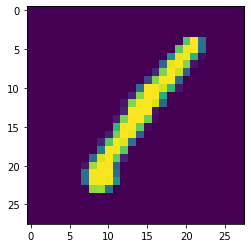

Label: 1


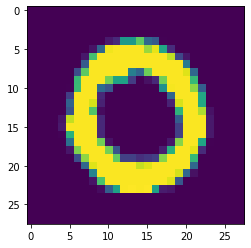

Label: 0


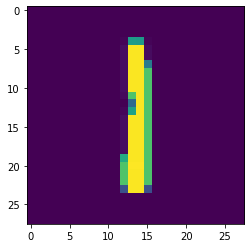

Label: 1


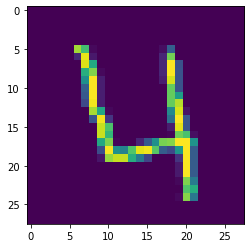

Label: 4


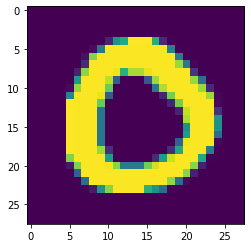

Label: 0


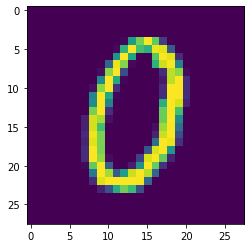

Label: 0


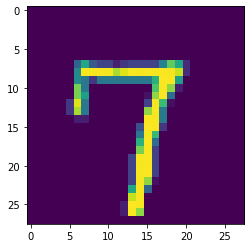

Label: 7


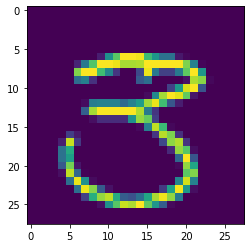

Label: 3


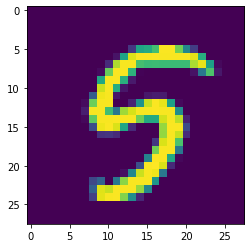

Label: 5


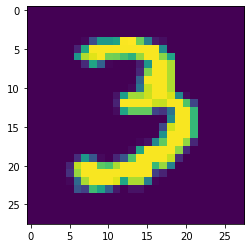

Label: 3


In [7]:
for i in range(10):
    plt.imshow(X[i].reshape(28, 28))
    plt.show()
    print('Label:', y[i])

### Create a Keras model for training

This architecture is similar to a smaller VGG

In [8]:
input_ = tf.keras.Input((28, 28, 1))
conv1 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu')(input_)
conv2 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu')(conv1)
mp1 = tf.keras.layers.MaxPool2D((2,2))(conv2)
conv3 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu')(mp1)
conv4 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu')(conv3)
conv5 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu')(conv4)
mp2 = tf.keras.layers.MaxPool2D((2,2))(conv5)
fl = tf.keras.layers.Flatten()(mp2)
dense1 = tf.keras.layers.Dense(8, activation='relu')(fl)
output = tf.keras.layers.Dense(10, activation='softmax')(dense1)

model = tf.keras.Model(inputs=input_, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 8)         584       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 8)         584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 8)           584   

In [9]:
model.compile('adam', 'categorical_crossentropy')

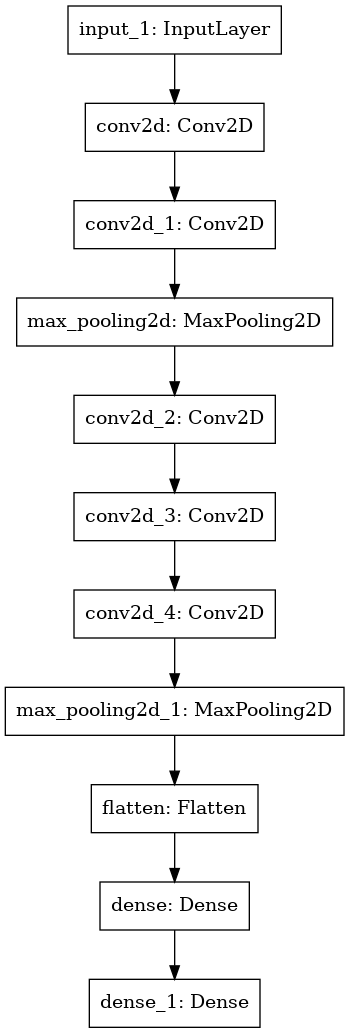

In [10]:
tf.keras.utils.plot_model(model)

### Fit the model using the training data

It's better to use the callbacks used in the previous notebook to better training results

In [11]:
hst = model.fit(X, y_encoded, batch_size=32, epochs=10, validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 25s 746us/sample - loss: 1.3205 - val_loss: 0.5759
Epoch 2/10
33600/33600 [==============================] - 24s 704us/sample - loss: 0.4197 - val_loss: 0.3134
Epoch 3/10
33600/33600 [==============================] - 23s 685us/sample - loss: 0.2260 - val_loss: 0.1739
Epoch 4/10
33600/33600 [==============================] - 24s 716us/sample - loss: 0.1532 - val_loss: 0.1450
Epoch 5/10
33600/33600 [==============================] - 23s 671us/sample - loss: 0.1228 - val_loss: 0.1161
Epoch 6/10
33600/33600 [==============================] - 24s 713us/sample - loss: 0.1061 - val_loss: 0.1061
Epoch 7/10
33600/33600 [==============================] - 23s 688us/sample - loss: 0.0950 - val_loss: 0.1089
Epoch 8/10
33600/33600 [==============================] - 24s 711us/sample - loss: 0.0863 - val_loss: 0.0908
Epoch 9/10
33600/33600 [==============================] - 24s 725us/sample - lo

### Try out some predictions

It's up to you to try the model performance on a separate training set. The prediction is only done to validate the training operation

In [12]:
predictions = model.predict(X)

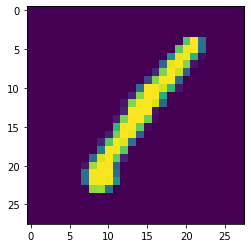

Prediction: [3.0775082e-09 9.9998891e-01 7.4497558e-07 7.8617104e-06 4.0402291e-08
 2.7937410e-09 2.1407661e-08 2.3873254e-06 1.0010989e-09 3.9792922e-11]


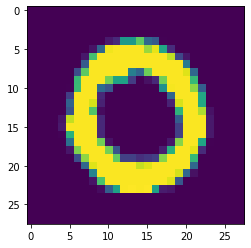

Prediction: [9.9922228e-01 3.7198109e-12 9.4787232e-05 3.2887951e-04 7.0122644e-11
 1.2613054e-04 1.5470625e-05 3.0421108e-06 2.4642875e-05 1.8481628e-04]


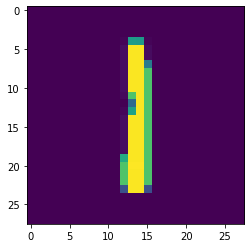

Prediction: [6.9370962e-09 9.9997151e-01 1.6824702e-05 5.1095149e-06 2.0279953e-09
 2.6349026e-10 2.0524056e-09 6.5718427e-06 2.6458789e-08 2.5107994e-11]


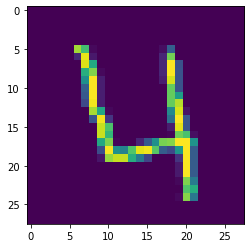

Prediction: [1.6922837e-04 5.2335388e-05 4.7095674e-03 1.4955917e-04 9.9002308e-01
 6.3588646e-05 2.5937948e-04 4.3161879e-03 3.6315610e-05 2.2070931e-04]


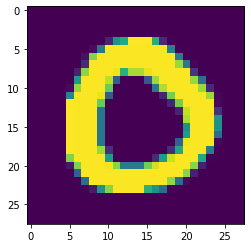

Prediction: [9.9996841e-01 2.3013305e-15 2.5197091e-06 9.7601760e-06 4.5888505e-14
 1.1673362e-05 1.1181594e-07 3.4110084e-07 1.4619148e-06 5.7250309e-06]


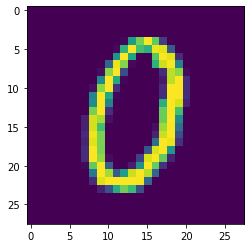

Prediction: [9.9694210e-01 1.0668120e-08 2.4018546e-04 1.8184739e-05 2.2814449e-07
 2.0350759e-05 4.3227548e-05 2.0516380e-03 8.8972680e-05 5.9502170e-04]


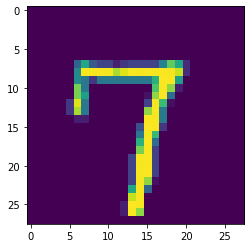

Prediction: [2.8705108e-07 5.8080997e-05 5.1602034e-05 8.3651641e-05 3.3637039e-06
 1.3213652e-09 6.0864955e-12 9.9976224e-01 2.1073786e-06 3.8677710e-05]


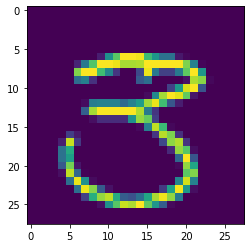

Prediction: [2.49650973e-12 3.91164301e-09 2.78814483e-09 9.99954104e-01
 9.37008785e-14 4.49977369e-06 4.37800176e-16 1.08482546e-07
 7.06746732e-06 3.41992709e-05]


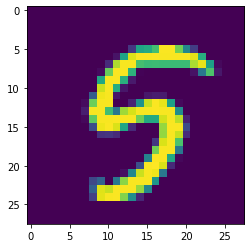

Prediction: [3.3290978e-15 1.6983847e-16 6.7396025e-22 2.5318380e-07 9.8786986e-14
 9.9999976e-01 3.7430628e-11 1.3361670e-17 7.4822322e-11 5.3775597e-09]


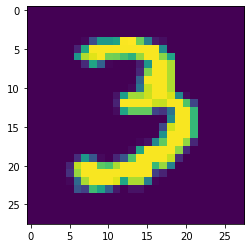

Prediction: [1.4502518e-11 2.3141834e-05 1.3424354e-08 9.9997389e-01 1.5622651e-12
 9.1082774e-07 3.5885672e-14 1.5669880e-06 7.2027632e-08 3.6876969e-07]


In [13]:
for i in range(10):
    plt.imshow(X[i].reshape(28, 28))
    plt.show()
    print('Prediction:', predictions[i])

### Convert the probabilities to labels

Get the index of the largest probability per row

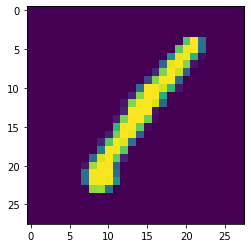

Prediction: 1


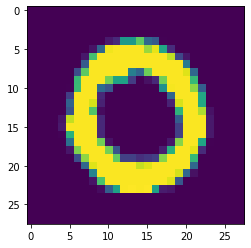

Prediction: 0


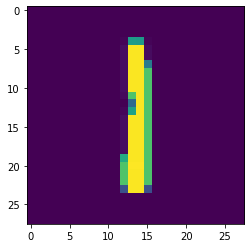

Prediction: 1


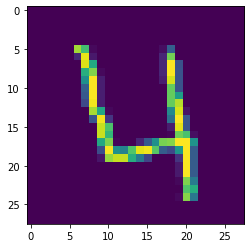

Prediction: 4


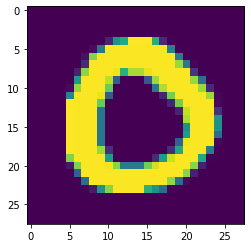

Prediction: 0


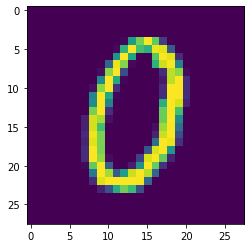

Prediction: 0


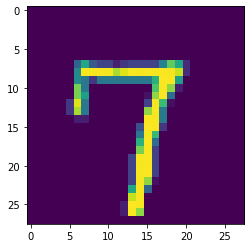

Prediction: 7


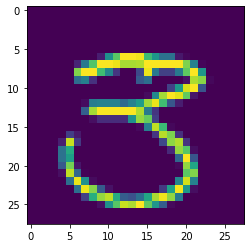

Prediction: 3


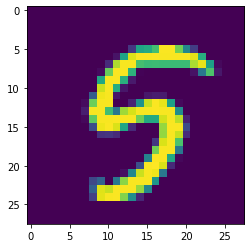

Prediction: 5


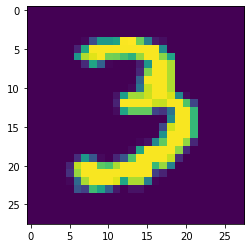

Prediction: 3


In [14]:
for i in range(10):
    plt.imshow(X[i].reshape(28, 28))
    plt.show()
    print('Prediction:', np.argmax(predictions[i]))